**Download Dataset CiCDDoS2019**

In [1]:
!gdown https://drive.google.com/uc?id=1OTS726FHnYMqPg6gaz2Ga-WvvhnLv6v1

Downloading...
From: https://drive.google.com/uc?id=1OTS726FHnYMqPg6gaz2Ga-WvvhnLv6v1
To: /content/ddos_01_12_prep_training.csv
15.5MB [00:00, 58.7MB/s]


**Install Jcopml Package**

In [2]:
!pip install jcopml

     |████████████████████████████████| 102kB 4.2MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33230 sha256=c653760395afa3d3aa2f89863d101ccdd16a96130550919c5a68b8545f77a7c1
  Stored in directory: /root/.cache/pip/wheels/82/22/ce/b8b4c3400f788e5050b5b4b4d988884b8ec72b6b8751693914
Successfully built jcopml


**Import Common Package**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
pd.options.display.max_columns =300
!pip install jcopml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from jcopml.plot import plot_missing_value

**Import Dataset CiCDDoS 2019**

In [76]:
df = pd.read_csv("./ddos_01_12_prep_training.csv")
df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,label
0,52380,443,6,1,2,0,0,0,0,0,0.000000,0.000000,0,0,0.0,0.0,1.000,0.000000e+00,1,1,1,1.000,0.000,1,1,0,0.0,0.0,0,0,0,0,0,0,40.0,0,2.000000e+06,0.000000,0,0,0.00,0.0,0.00,0,0,0,0,0,1,1,0,0,0.00,0.000000,0.0,40.0,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0,BENIGN
1,443,52380,6,2,3,0,62,0,31,0,20.666667,17.897858,0,0,0.0,0.0,1.000,0.000000e+00,1,1,2,1.000,0.000,1,1,0,0.0,0.0,0,0,1,0,0,0,60.0,0,1.500000e+06,0.000000,0,31,23.25,15.5,240.25,0,0,1,0,0,1,0,0,0,31.00,20.666667,0.0,60.0,0,0,0,0,0,0,3,62,0,0,245,-1,1,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1,BENIGN
2,443,52380,6,218,1,2,0,0,0,0,0.000000,0.000000,0,0,0.0,0.0,109.000,8.626703e+01,170,48,0,0.000,0.000,0,0,48,48.0,0.0,48,48,0,0,0,0,20.0,40,4.587156e+03,9174.311927,0,0,0.00,0.0,0.00,0,0,0,0,0,1,1,0,2,0.00,0.000000,0.0,20.0,0,0,0,0,0,0,1,0,2,0,245,0,0,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1,BENIGN
3,0,0,0,115366430,52,0,0,0,0,0,0.000000,0.000000,0,0,0.0,0.0,2262086.863,4.120832e+06,9988327,1,115366430,2262086.863,4120831.638,9988327,1,0,0.0,0.0,0,0,0,0,0,0,0.0,0,4.507377e-01,0.000000,0,0,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.0,0.0,0,0,0,0,0,0,52,0,0,0,-1,-1,0,0,6.666667e+00,1.073087e+00,8,4,9.613862e+06,2.884856e+05,9988327,9110910,0,BENIGN
4,68,67,17,109157387,16,0,4800,0,300,300,300.000000,0.000000,0,0,0.0,0.0,7277159.133,4.248209e+06,14600796,2166672,109157387,7277159.133,4248209.222,14600796,2166672,0,0.0,0.0,0,0,0,0,0,0,404.0,0,1.465773e-01,0.000000,300,300,300.00,0.0,0.00,0,0,0,0,0,0,0,0,0,318.75,300.000000,0.0,404.0,0,0,0,0,0,0,16,4800,0,0,-1,-1,15,20,5.929966e+06,3.774939e+06,10054849,2647210,1.015194e+07,2.795046e+06,14600796,6304546,0,BENIGN


**Plot Missing Value Dataset**

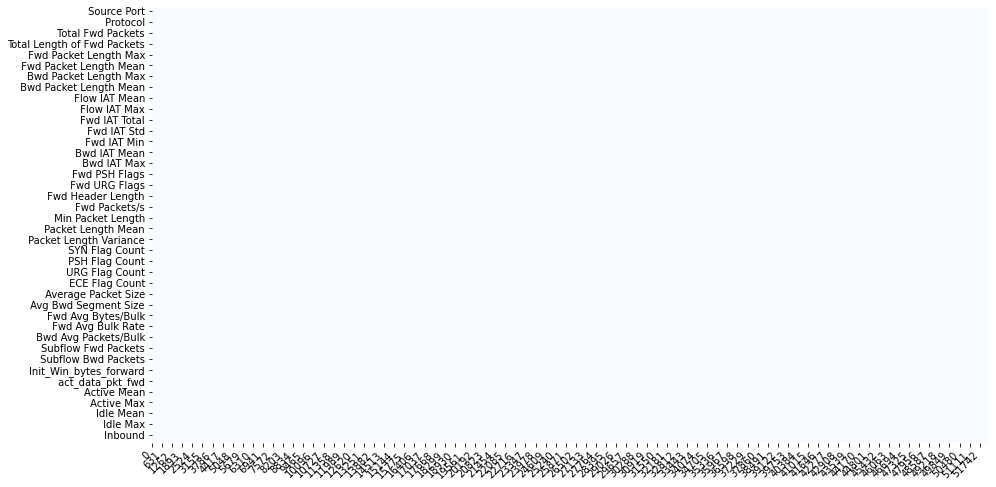

In [5]:
plot_missing_value(df)

**Random Row Dataset**

In [7]:
df = df.sample(n = 52318, replace = False, random_state= 32)

**Remapping Feature Value of label Target DDoS**

In [8]:
df['label'] = df['label'].map({'BENIGN' : 0, 'DDOS' : 1})

In [9]:
df.label.value_counts()

1    26892
0    25426
Name: label, dtype: int64

In [10]:
df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,label
29801,50872,443,6,90307,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,90307.0,0.0,90307,90307,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20.0,20,1.107334e+01,11.073339,0,0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,1,0.0,0.0,0.0,20.0,0,0,0,0,0,0,1,0,1,0,63498,31396,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0,0
17909,35868,31617,17,49,2,0,910,0,455,455,455.0,0.0,0,0,0.0,0.0,49.0,0.0,49,49,49,49.0,0.0,49,49,0,0.0,0.0,0,0,0,0,0,0,0.0,0,4.081633e+04,0.000000,455,455,455.0,0.0,0.0,0,0,0,0,0,0,0,0,0,682.5,455.0,0.0,0.0,0,0,0,0,0,0,2,910,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0,0,1,1
9798,900,12985,17,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,-2.0,0,2.000000e+06,0.000000,1472,1472,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,-2.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0,0,0.0,0.0,0,0,1,1
18295,61850,51639,17,1,2,0,924,0,462,462,462.0,0.0,0,0,0.0,0.0,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40.0,0,2.000000e+06,0.000000,462,462,462.0,0.0,0.0,0,0,0,0,0,0,0,0,0,693.0,462.0,0.0,40.0,0,0,0,0,0,0,2,924,0,0,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,1,1
50409,44243,4182,6,1,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40.0,0,2.000000e+06,0.000000,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,40.0,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,1,1


**Exploratory Data Analysis of Dataset**

*Flow Duration*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


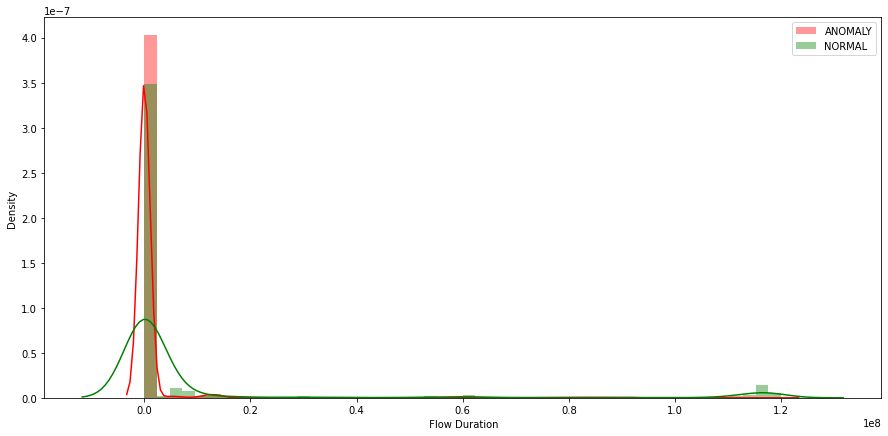

In [18]:
plt.figure(figsize=(15, 7))
sns.distplot(df[df['label'] == 1][' Flow Duration'], color='red',label='ANOMALY')
sns.distplot(df[df['label'] == 0][' Flow Duration'], color='green',label='NORMAL')

plt.legend()

*Average Packet Size*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


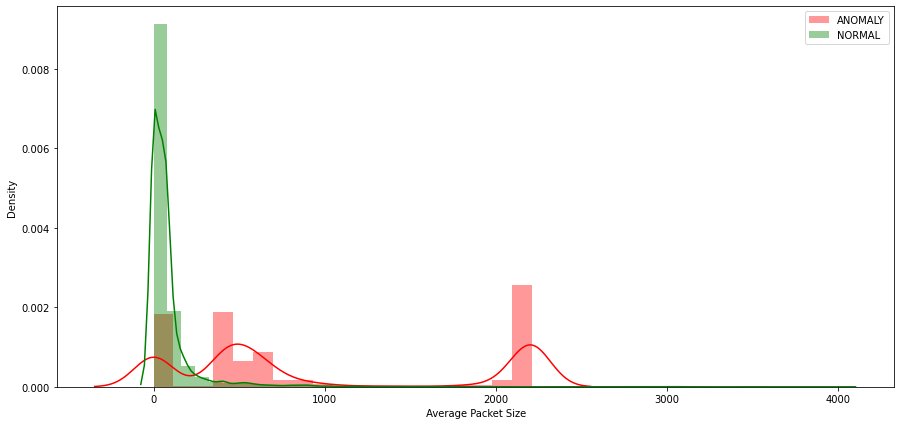

In [19]:
plt.figure(figsize=(15, 7))
sns.distplot(df[df['label'] == 1][' Average Packet Size'], color='red',label='ANOMALY')
sns.distplot(df[df['label'] == 0][' Average Packet Size'], color='green',label='NORMAL')

plt.legend()

*FWD Packet/s*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


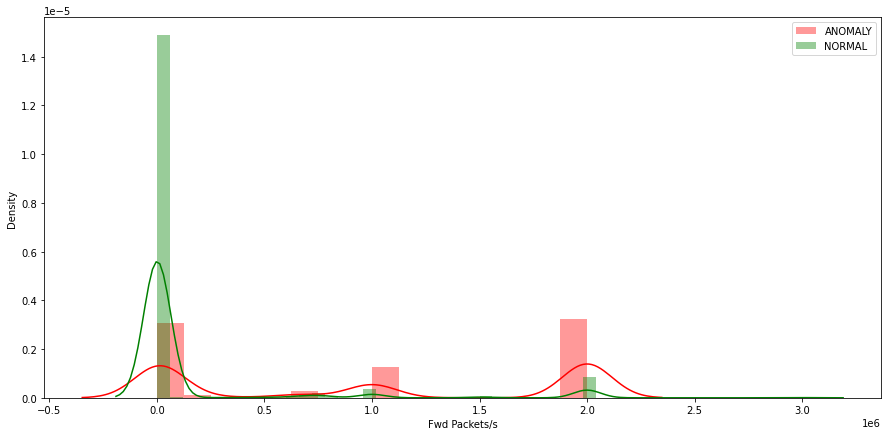

In [22]:
plt.figure(figsize=(15, 7))
sns.distplot(df[df['label'] == 1]['Fwd Packets/s'], color='red',label='ANOMALY')
sns.distplot(df[df['label'] == 0]['Fwd Packets/s'], color='green',label='NORMAL')

plt.legend()

*BWD Packet/s*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


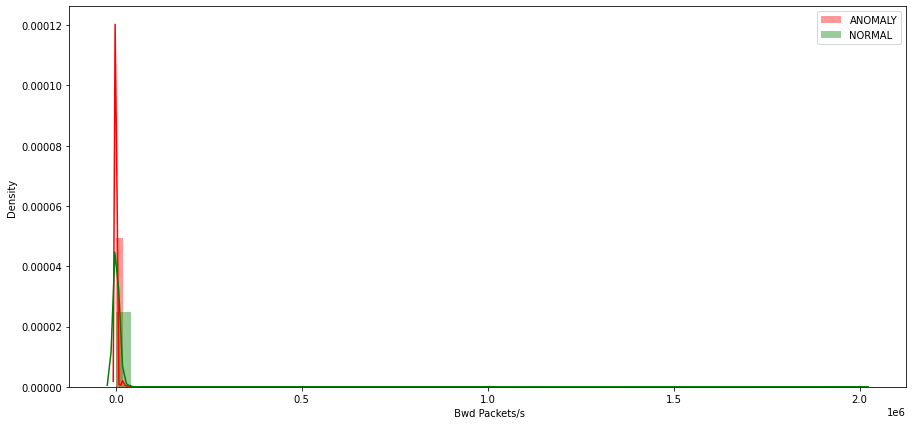

In [24]:
plt.figure(figsize=(15, 7))
sns.distplot(df[df['label'] == 1][' Bwd Packets/s'], color='red',label='ANOMALY')
sns.distplot(df[df['label'] == 0][' Bwd Packets/s'], color='green',label='NORMAL')

plt.legend()

*Count Plot Inbound and Down/Up Ratio Features*

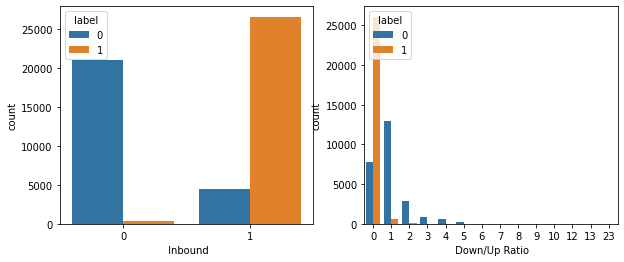

In [39]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.countplot(x=' Inbound', data=df, hue='label', ax=ax[0])
sns.countplot(x=' Down/Up Ratio', data=df, hue='label', ax=ax[1])



**Split Training And Testing Data**

In [52]:
X = df.drop(columns="label")
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41854, 79), (10464, 79), (41854,), (10464,))

In [53]:
numeric = [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags',
       ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count',
       ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count',
       ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min']

***Split Numeric and Categoric Features in ColumnTransformer***

In [59]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric),
    ('categoric', cat_pipe(encoder='onehot'), [" Inbound"]),
])

In [60]:
from xgboost import XGBClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp


**Fit Model Using XGBoost and Randomized Search CV Hyperparameter Tuning**

In [62]:
model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=4, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.5min finished


{'algo__colsample_bytree': 0.9763799669573133, 'algo__gamma': 3, 'algo__learning_rate': 0.05820013372709852, 'algo__max_depth': 4, 'algo__n_estimators': 163, 'algo__reg_alpha': 0.07362945281639222, 'algo__reg_lambda': 2.752717392942944, 'algo__subsample': 0.6401537692938899}
0.9999283222631051 0.9997849650765446 0.9997133027522935


**Print Model Score Training and Testing**


In [68]:
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

0.9999283222631051 0.9997849650765446 0.9997133027522935


In [63]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

**Feature Importance**

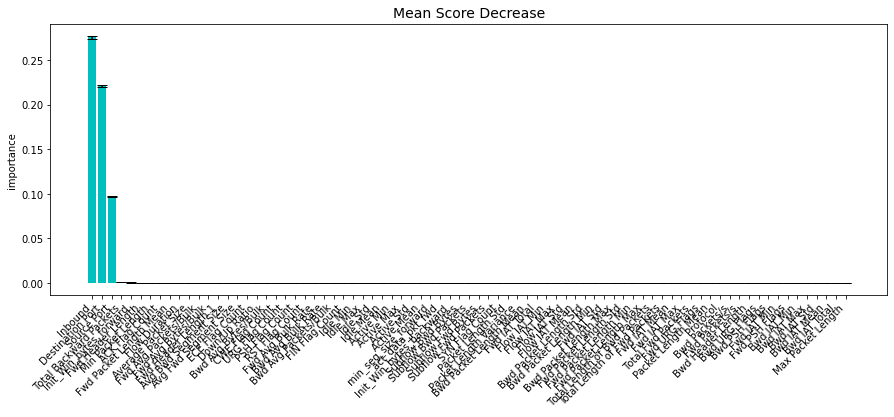

In [70]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)

# Fitting Model Again Only Using 3 Features#

In [79]:
X = df[[' Source Port', ' Destination Port',' Inbound']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41854, 3), (10464, 3), (41854,), (10464,))

In [80]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(),[' Source Port', ' Destination Port'] ),
    ('categoric', cat_pipe(encoder='onehot'), [" Inbound"]),
])

In [81]:
from xgboost import XGBClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp


In [83]:

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=4, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   19.0s finished


{'algo__colsample_bytree': 0.9763799669573133, 'algo__gamma': 3, 'algo__learning_rate': 0.05820013372709852, 'algo__max_depth': 4, 'algo__n_estimators': 163, 'algo__reg_alpha': 0.07362945281639222, 'algo__reg_lambda': 2.752717392942944, 'algo__subsample': 0.6401537692938899}


**Print Score Training and Testing**

In [84]:
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

0.9993310077889808 0.9992115483183058 0.9993310397553516


**Feature Importance Again**

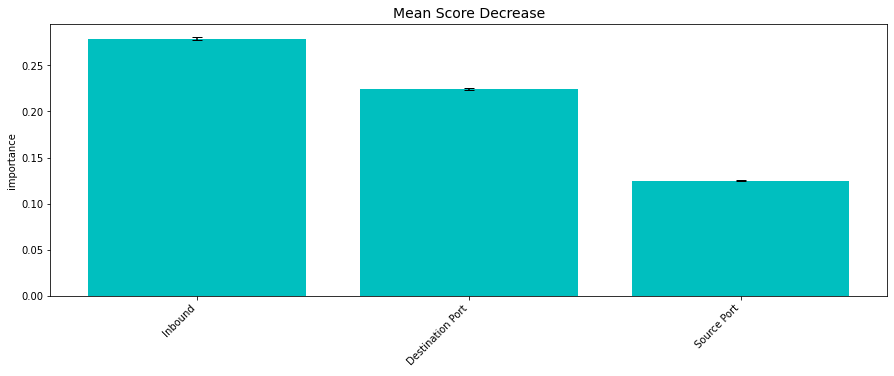

In [85]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)